#### Ordered Integer Encoding | Target guided encodings

The previous section, we showed to convert a label into a number, by using one hot encoding, replacing by a digit or replacing by frequency or counts of observations. These methods are simple, make (almost) no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the target mean (mean encoding / target encoding)
- Replacing the labels by the probability ratio of the target being 1 or 0
- Weight of evidence.

All of the above methods have something in common:

- the encoding is guided by the target, and
- they create a monotonic relationship between the variable and the target.
Monotonicity

**A monotonic relationship is a relationship that does one of the following:**

- (1) as the value of one variable increases, so does the value of the other variable; or
- (2) as the value of one variable increases, the value of the other variable decreases.

In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target value decreases.

**Advantages of target guided encodings**

- Capture information within the category, therefore creating more predictive features
- Create a monotonic relationship between the variable and the target, therefore suitable for linear models
- Do not expand the feature space

**Limitations**

- Prone to cause over-fitting
- Difficult to cross-validate with current libraries

*Note*

The methods discussed in this and the coming 3 notebooks can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".



**Ordered Integer Encoding**

Ordering the categories according to the target means assigning a number to the category from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category.

For example, we have the variable city with values London, Manchester and Bristol; if the default rate is 30% in London, 20% in Bristol and 10% in Manchester, then we replace London by 1, Bristol by 2 and Manchester by 3.


Dataset: House price

In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

In [71]:
use_columns = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('../datasets/houseprice.csv', usecols=use_columns)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [72]:
for col in data.columns:
    print(f"{col}: {len(data[col].unique())} labels")

Neighborhood: 25 labels
Exterior1st: 15 labels
Exterior2nd: 16 labels
SalePrice: 663 labels


In [73]:
# let's explore the unique categories
print(f"Neighborhood: \n {data.Neighborhood.unique()} \n")
print(f"Exterior1st: \n {data.Exterior1st.unique()} \n")
print(f"Exterior2nd: \n {data.Exterior2nd.unique()} \n")

Neighborhood: 
 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Exterior1st: 
 ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 

Exterior2nd: 
 ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock'] 



*Important*
We select which digit to assign each category using the train set, and then use those mappings in the test set.

**Note that to do this technique with pandas, we need to keep the target within the training set**

In [74]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']],  # this time we keep the target!!
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (1022, 4), Test: (438, 4)


**Explore original relationship between categorical variables and target**

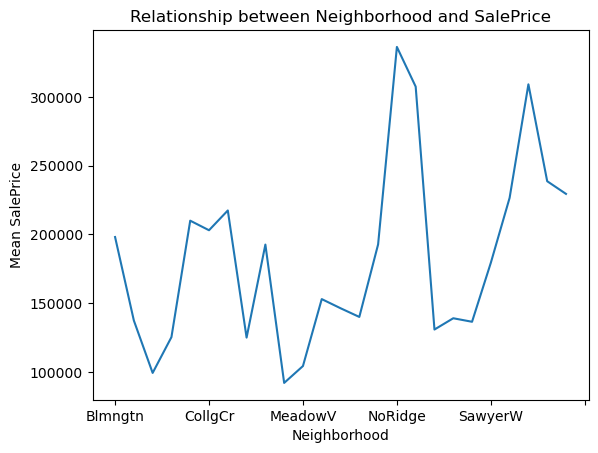

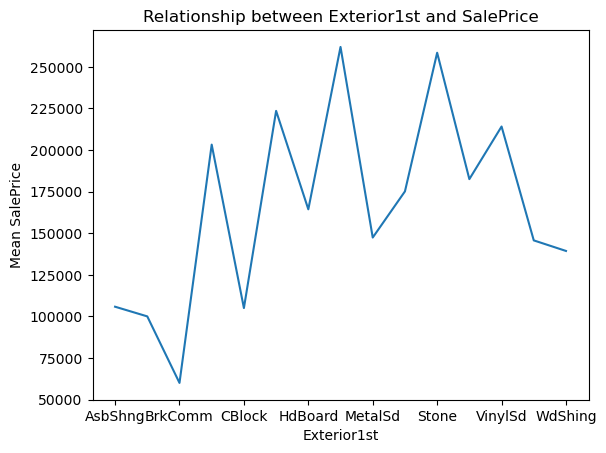

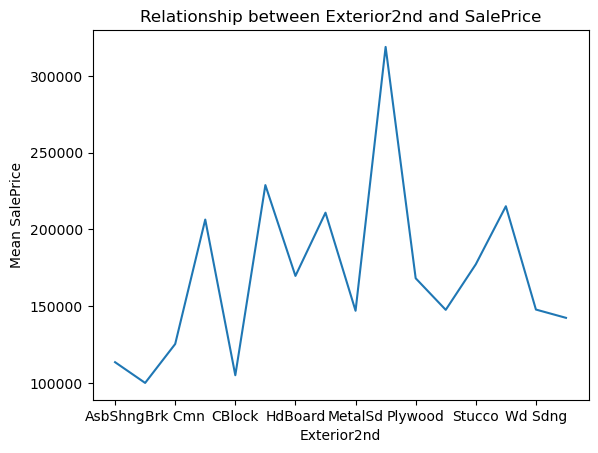

In [75]:
# let's explore the relationship of the categories with the target

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()

You can see that the relationship between the target and the categories of the categorical variables goes up and down, depending on the category.

**Ordered Integer encoding with pandas**

In [76]:
# let's order the labels according to the mean target value

X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values()

Neighborhood
IDOTRR      92174.166667
BrDale      99440.000000
MeadowV    104441.666667
Edwards    125082.676056
BrkSide    125438.414634
OldTown    130958.328767
Sawyer     136596.442623
Blueste    137500.000000
SWISU      139154.666667
NPkVill    140107.142857
NAmes      146435.264901
Mitchel    153070.444444
SawyerW    179463.088889
Gilbert    192662.290909
NWAmes     192788.235294
Blmngtn    198164.500000
CollgCr    203086.371429
ClearCr    210034.666667
Crawfor    217453.914286
Somerst    226644.196429
Veenker    229500.000000
Timber     238700.100000
NridgHt    307418.137255
StoneBr    309105.937500
NoRidge    336264.666667
Name: SalePrice, dtype: float64

In the above cell, we ordered the categories from the neighbourhood where the houses sale prices are cheaper (IDOTRR), to the neighbourhood where the house prices are, on average, more expensive (NoRidge).

In the next cells, we will replace those categories, ordered as they are, by the numbers 0 to k, where k is the number of different categories minus 1, in this case 25 - 1 = 24.

So IDOTRR will be replaced by 0 and NoRidge by 24, just to be clear.

In [77]:
# first  we generate an ordered list with the labels

ordered_labels = X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values().index

ordered_labels

Index(['IDOTRR', 'BrDale', 'MeadowV', 'Edwards', 'BrkSide', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Somerst', 'Veenker', 'Timber', 'NridgHt', 'StoneBr', 'NoRidge'],
      dtype='object', name='Neighborhood')

In [78]:
# next let's create a dictionary with the mappings of categories to numbers
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
ordinal_mapping


{'IDOTRR': 0,
 'BrDale': 1,
 'MeadowV': 2,
 'Edwards': 3,
 'BrkSide': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'Blueste': 7,
 'SWISU': 8,
 'NPkVill': 9,
 'NAmes': 10,
 'Mitchel': 11,
 'SawyerW': 12,
 'Gilbert': 13,
 'NWAmes': 14,
 'Blmngtn': 15,
 'CollgCr': 16,
 'ClearCr': 17,
 'Crawfor': 18,
 'Somerst': 19,
 'Veenker': 20,
 'Timber': 21,
 'NridgHt': 22,
 'StoneBr': 23,
 'NoRidge': 24}

In [79]:
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable, target):

    # first  we generate an ordered list with the labels
    ordered_labels = df.groupby([variable])[target].mean().sort_values().index

    # return the dictionary with mappings
    return {k: i for i, k in enumerate(ordered_labels, 0)}


def integer_encode(train, test, variable, ordinal_mapping):

    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [80]:
# and now we run a loop over the remaining categorical variables

for variable in data.columns:
    if not variable == 'SalePrice':
        mappings = find_category_mappings(X_train, variable, 'SalePrice')
        integer_encode(X_train, X_test, variable, mappings)

In [81]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,16,11,13,219500
682,17,5,7,173000
960,4,5,8,116500
1384,3,4,4,105000
1100,8,5,7,60000


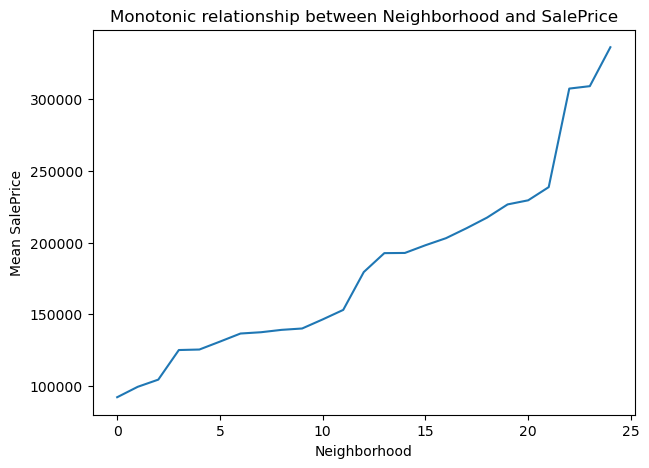

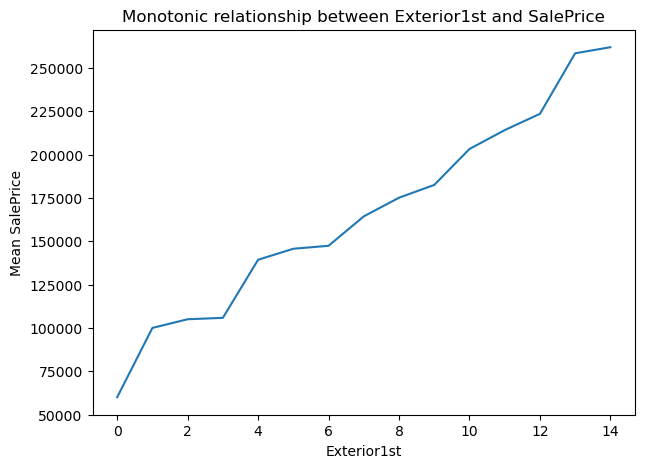

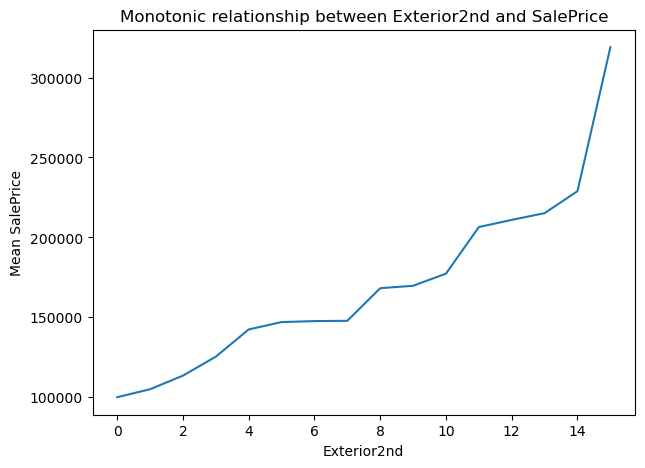

In [82]:
# let's inspect the newly created monotonic relationship
# between the variables and the target

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    fig = plt.figure(figsize=(7,5))
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Monotonic relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()

We see from the plots above that the relationship between the categories and the target is now monotonic, and for the first 2 variables, almost linear, which helps improve linear models performance.

*Note*

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. I will explain how to do this, in a later notebook.

#### Mean Encoding | Target Guided Encoding

Mean encoding implies replacing the category by the average target value for that category. For example, if we have the variable city, with categories London, Manchester and Bristol, and we want to predict the default rate, if the default rate for London is 30% we replace London by 0.3, if the default rate for Manchester is 20% we replace Manchester by 0.2 and so on.


Dataset: Titanic 

In [83]:
# load the dataset
use_columns = ['cabin', 'sex', 'embarked', 'survived']

data = pd.read_csv('../datasets/titanic.csv', usecols=use_columns)
data.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S


In [84]:
# lets count the number of missing values per variables
for col in data.columns:
    print(f"{col} missing values: {data[col].isnull().sum()}")

survived missing values: 0
sex missing values: 0
cabin missing values: 1014
embarked missing values: 2


In [85]:
data['cabin'] = data['cabin'].astype(str).str[0]

In [86]:
data['embarked'].fillna('Missing', inplace=True)

In [87]:
# let's have a look at how many labels each variable has
for col in data.columns:
    if not col == 'Survived':
        print(f"{col} unique label:\n{data[col].value_counts()}")

survived unique label:
0    809
1    500
Name: survived, dtype: int64
sex unique label:
male      843
female    466
Name: sex, dtype: int64
cabin unique label:
n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin, dtype: int64
embarked unique label:
S          914
C          270
Q          123
Missing      2
Name: embarked, dtype: int64


We can see the missing values in embarked, and cabin variable. For now, we filled missing embarked variables with "Missing" labels.

**Important**

We calculate the target mean per category using the train set, and then use those mappings in the test set.

Note that for the pandas implementation we need to keep the target in the training set:

In [88]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked', 'survived']],  # this time we keep the target!!
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (916, 4), Test: (393, 4)


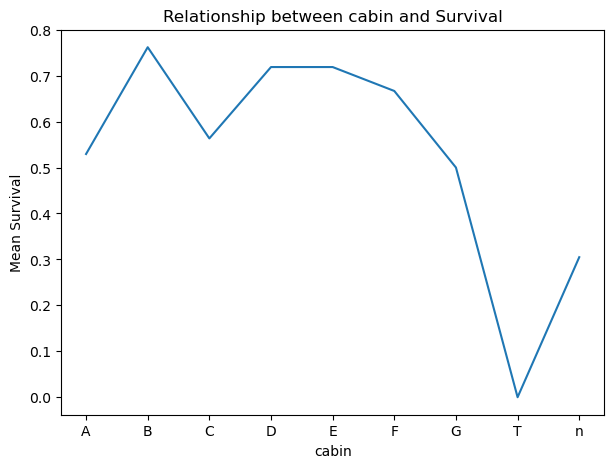

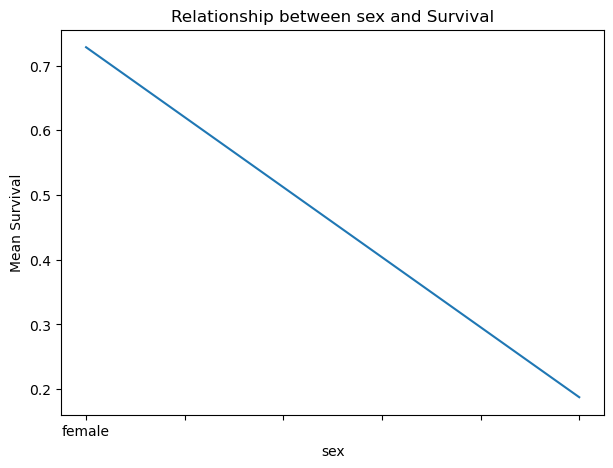

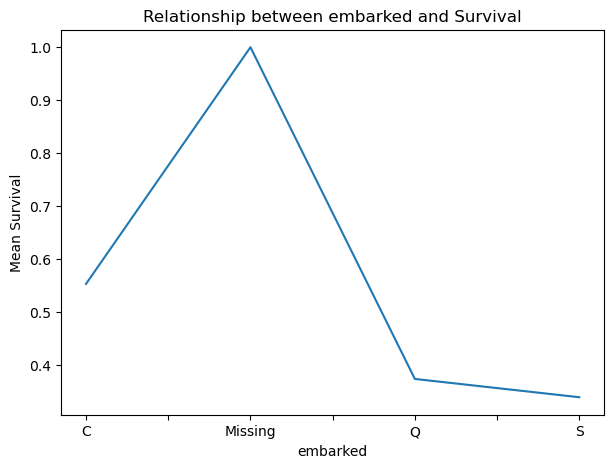

In [89]:
# let's explore the relationship of the categories with the target

for var in ['cabin', 'sex', 'embarked']:
    fig = plt.figure(figsize=(7,5))
    fig = X_train.groupby([var])['survived'].mean().plot()
    fig.set_title('Relationship between {} and Survival'.format(var))
    fig.set_ylabel('Mean Survival')
    plt.show()

You can see that the relationship between the target and cabin and embarked goes up and down, depending on the category.

**Mean Encoding**


In [90]:
# let's calculate the mean target value per category for cabin
ordered_labels = X_train.groupby(['cabin'])['survived'].mean().to_dict()
ordered_labels

{'A': 0.5294117647058824,
 'B': 0.7619047619047619,
 'C': 0.5633802816901409,
 'D': 0.71875,
 'E': 0.71875,
 'F': 0.6666666666666666,
 'G': 0.5,
 'T': 0.0,
 'n': 0.30484330484330485}

In [91]:
# we can turn the previous commands into 2 functions

def find_category_mappings(df, variable, target):
    return df.groupby([variable])[target].mean().to_dict()


def integer_encode(train, test, variable, ordinal_mapping):

    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [92]:
# and now we run a loop over the remaining categorical variables

for variable in data.columns:
    if not variable == 'survived':
        mappings = find_category_mappings(X_train, variable, 'survived')
        integer_encode(X_train, X_test, variable, mappings)
        

In [93]:
X_train.head()

,cabin,sex,embarked,survived
501,0.304843,0.728358,0.338957,1
588,0.304843,0.728358,0.338957,1
402,0.304843,0.728358,0.553073,1
1193,0.304843,0.187608,0.373494,0
686,0.304843,0.728358,0.373494,1


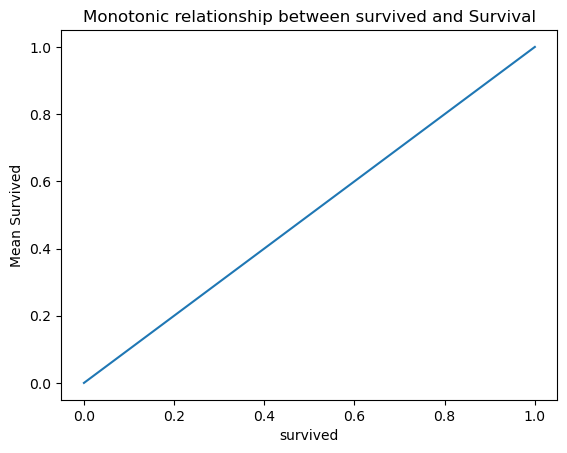

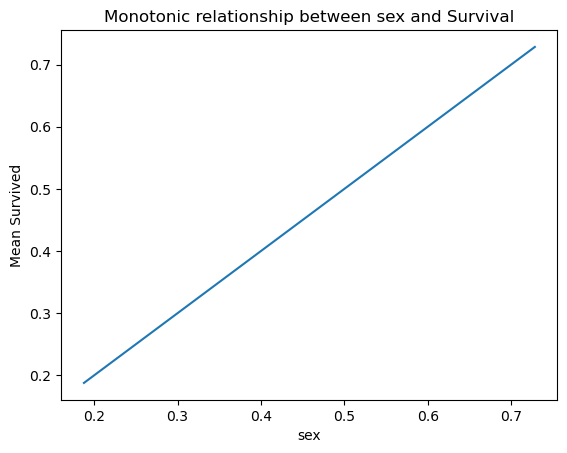

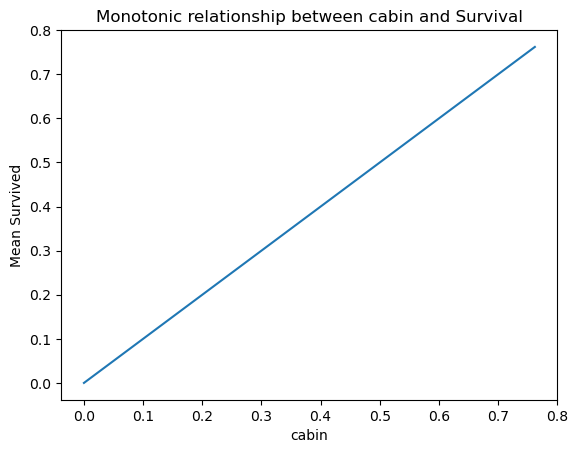

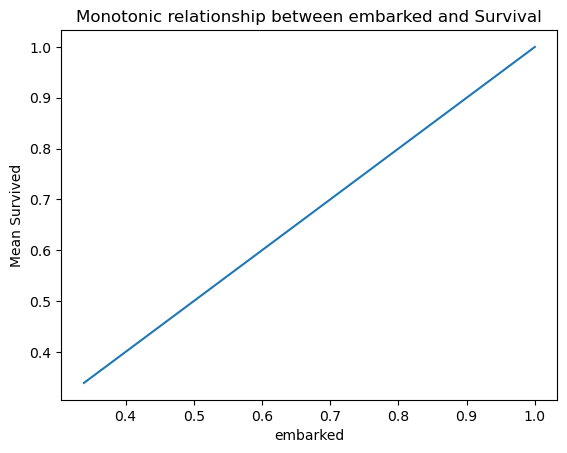

In [94]:
# let's inspect the newly created monotonic relationship
# between the variables and the target

for var in data.columns:
    if not variable == 'survived':
        fig = X_train.groupby([var])['survived'].mean().plot()
        fig.set_title('Monotonic relationship between {} and Survival'.format(var))
        fig.set_ylabel('Mean Survived')
        plt.show()

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. I will explain how to do this, in a later notebook.